# [ATM 623: Climate Modeling](../index.ipynb)

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

# Lecture 3: Climate sensitivity and feedback

### About these notes:

This document uses the interactive [`Jupyter notebook`](https://jupyter.org) format. The notes can be accessed in several different ways:

- The interactive notebooks are hosted on `github` at https://github.com/brian-rose/ClimateModeling_courseware
- The latest versions can be viewed as static web pages [rendered on nbviewer](http://nbviewer.ipython.org/github/brian-rose/ClimateModeling_courseware/blob/master/index.ipynb)
- A complete snapshot of the notes as of May 2017 (end of spring semester) are [available on Brian's website](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2017/Notes/index.html).

[Also here is a legacy version from 2015](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/Notes/index.html).

Many of these notes make use of the `climlab` package, available at https://github.com/brian-rose/climlab

## Contents

1. [Radiative forcing](#section1)
2. [Climate sensitivity (without feedback)](#section2)
3. [The feedback concept](#section3)
4. [Climate feedback: some definitions](#section4)
5. [Climate sensitivity with feedback](#section5)
6. [Contribution of individual feedback processes to Equilibrium Climate Sensitivity](#section6)
7. [Feedbacks diagnosed from complex climate models](#section7)
8. [Feedback analysis of the zero-dimensional model with variable albedo](#section8)

____________
<a id='section1'></a>

## 1. Radiative forcing
____________

Let’s say we instantaneously double atmospheric CO$_2$. What happens?

- The atmosphere is less efficient at radiating energy away to space.
- OLR will decrease
- The climate system will begin gaining energy.



We will call this abrupt decrease in OLR the **radiative forcing**, a positive number in W m$^{-2}$

$$ \Delta R = OLR_i - OLR_{2xCO2} $$

$\Delta R$ is a measure of the rate at which energy begins to accumulate in the climate system after an abrupt increase in greenhouse gases, but *before any change in climate* (i.e. temperature).

What happens next?

____________
<a id='section2'></a>

## 2. Climate sensitivity (without feedback)
____________

Let’s use our simple zero-dimensional EBM to calculate the resulting change in **equilibrium temperature**. 

How much warming will we get once the climate system has adjusted to the radiative forcing?

First note that at equilibrium we must have

$$ASR = OLR$$

and in our very simple model, there is no change in ASR, so 
$$ ASR_f = ASR_f $$
(with  standing for final.)

From this we infer that
$$ OLR_f = OLR_i $$

The new equilibrium will have **exactly the same OLR** as the old equilibrium, but a **different surface temperature**.

The climate system must warm up by a certain amount to get the OLR back up to its original value! The question is, **how much warming is necessary**? In other words, **what is the new equilibrium temperature**?


### Equilibrium Climate Sensitivity (ECS)

We now define the Equilibrium Climate Sensitivity (denoted ECS or $\Delta T_{2xCO2}$):

*The global mean surface warming necessary to balance the planetary energy budget after a doubling of atmospheric CO$_2$.*

The temperature must increase so that the increase in OLR is exactly equal to the radiative forcing:

$$ OLR_f - OLR_{2xCO2} = \Delta R $$

From last lecture, we have linearized our model for OLR with a slope $\lambda_0 = 3.3$ W m$^{-2}$ K$^{-1}$. This means that a global warming of 1 degree causes a 3.3 W m$^{-2}$ increase in the OLR. So we can write:

$$OLR_f \approx OLR_{2xCO2} + \lambda_0 \Delta T_0 $$

where we are writing the change in temperature as

$$ \Delta T_0 = T_f - T_i $$

(and the subscript zero will remind us that this is the response in the simplest model, in the absence of any feedbacks)

To achieve energy balance, the planet must warm up by

$$ \Delta T_0 = \frac{\Delta R}{\lambda_0} $$

As we will see later, the actual radiative forcing due CO$_2$ doubling is about 4 W m$^{-2}$. 

So our model without feedback gives a prediction for climate sensitivity:

In [1]:
#  Repeating code from Lecture 2
sigma = 5.67E-8  #  Stefan-Boltzmann constant in W/m2/K4
Q = 341.3  #  global mean insolation in W/m2
alpha = 101.9 / Q    #  observed planetary albedo
Te = ((1-alpha)*Q/sigma)**0.25  #  Emission temperature (definition)
Tsbar = 288.  # global mean surface temperature in K
beta = Te / Tsbar   #  Calculate value of beta from observations
lambda_0 = 4 * sigma * beta**4 * Tsbar**3

In [2]:
DeltaR = 4.  # Radiative forcing in W/m2
DeltaT0 = DeltaR / lambda_0
print 'The Equilibrium Climate Sensitivity in the absence of feedback is {:.1f} K.'.format(DeltaT0)

The Equilibrium Climate Sensitivity in the absence of feedback is 1.2 K.


Question: what are the current best estimates for the actual warming (including all feedbacks) in response to a doubling of CO$_2$?

We’ll now look at the feedback concept. Climate feedbacks tend to amplify the response to increased CO$_2$. But $\Delta T_0$ is a meaningful climate sensitivity in the absence of feedback.

$\Delta T_0 = 1.2$ K is the ** warming that we would have if the Earth radiated the excess energy away to space as a blackbody**, and with no change in the planetary albedo.

____________
<a id='section3'></a>

## 3. The feedback concept
____________

A concept borrowed from electrical engineering. You have all heard or used the term before, but we’ll try take a more precise approach today.

A feedback occurs when a portion of the output from the action of a system is added to the input and subsequently alters the output:

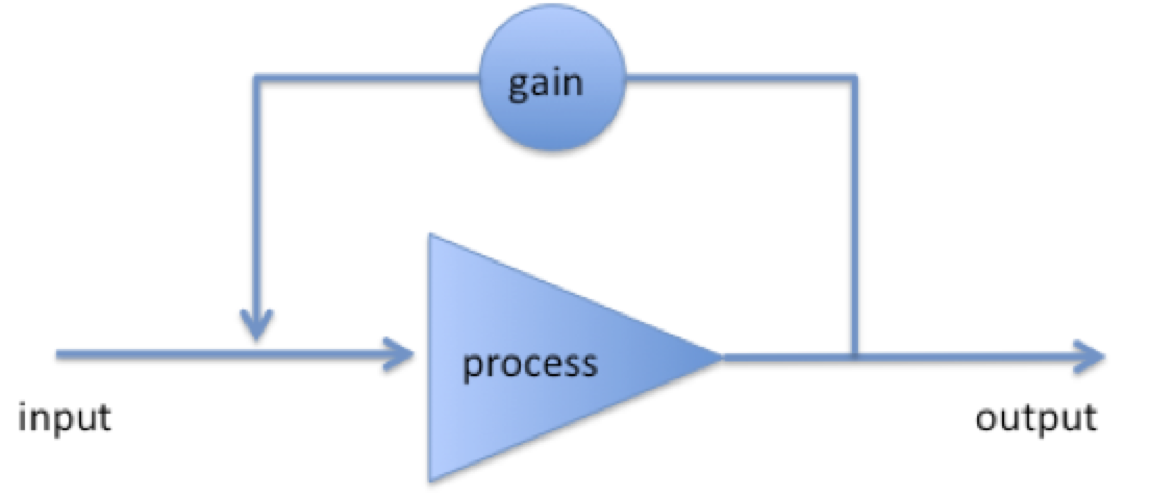

In [3]:
from IPython.display import Image
Image(filename='../images/feedback_sketch.png', width=500)

The result of a loop system can either be **amplification** or **dampening** of the process, depending on the sign of the gain in the loop, which we will denote $f$.

We will call amplifying feedbacks **positive** ($f>0$) and damping feedbacks **negative** ($f<0$).

We can think of the “process” here as the entire climate system, which contains many examples of both positive and negative feedback.

### Example: the water vapor feedback

The capacity of the atmosphere to hold water vapor (saturation specific humidity) increases exponentially with temperature. Warming is thus accompanied by moistening (more water vapor), which leads to more warming due to the enhanced water vapor greenhouse effect.

**Positive or negative feedback?**

### Example: the ice-albedo feedback

Colder temperatures lead to expansion of the areas covered by ice and snow, which tend to be more reflective than water and vegetation. This causes a reduction in the absorbed solar radiation, which leads to more cooling. 

**Positive or negative feedback?**

*Make sure it’s clear that the sign of the feedback is the same whether we are talking about warming or cooling.*

_____________
<a id='section4'></a>
## 4. Climate feedback: some definitions
____________

We start with an initial radiative forcing , and get a response
$$ \Delta T_0 = \frac{\Delta R}{\lambda_0} $$


Now consider what happens in the presence of a feedback process. For a concrete example, let’s take the **water vapor feedback**. For every degree of warming, there is an additional increase in the greenhouse effect, and thus additional energy added to the system.

Let’s denote this extra energy as 
$$ f \lambda_0 \Delta T_0 $$

where $f$ is the **feedback amount**, a number that represents what fraction of the output gets added back to the input. $f$ must be between $-\infty$ and +1. 

For the example of the water vapor feedback, $f$ is positive (between 0 and +1) – the process adds extra energy to the original radiative forcing.


The amount of energy in the full "input" is now
$$ \Delta R + f \lambda_0 \Delta T_0 $$
or
$$ (1+f) \lambda_0 \Delta T_0 $$

But now we need to consider the next loop. A fraction $f$ of the additional energy is also added to the input, giving us
$$ (1+f+f^2) \lambda_0 \Delta T_0 $$

and we can go round and round, leading to the infinite series
$$ (1+f+f^2+f^3+ ...) \lambda_0 \Delta T_0 = \lambda_0 \Delta T_0 \sum_{n=0}^{\infty} f^n $$

Question: what happens if $f=1$?

It so happens that this infinite series has an exact solution

$$ \sum_{n=0}^{\infty} f^n = \frac{1}{1-f} $$

So the full response including all the effects of the feedback is actually

$$ \Delta T = \frac{1}{1-f} \Delta T_0 $$

This is also sometimes written as 
$$ \Delta T = g \Delta T_0 $$

where 

$$ g = \frac{1}{1-f} = \frac{\Delta T}{\Delta T_0} $$

is called the **system gain** -- the ratio of the actual warming (including all feedbacks) to the warming we would have in the absence of feedbacks.

So if the overall feedback is positive, then $f>0$ and $g>1$.

And if the overall feedback is negative?

_____________
<a id='section5'></a>
## 5. Climate sensitivity with feedback
____________

ECS is an important number. A major goal of climate modeling is to provide better estimates of ECS and its uncertainty.

Latest IPCC report AR5 gives a likely range of 1.5 to 4.5 K. (There is lots of uncertainty in these numbers – we will definitely come back to this question)

So our simple estimate of the no-feedback change $\Delta T_0$ is apparently underestimating climate sensitivity. 

Saying the same thing another way: the overall net climate feedback is positive, amplifying the response, and the system gain $g>1$.


Let’s assume that the true value is $\Delta T_{2xCO2} = 3$ K (middle of the range). This implies that the gain is

$$ g = \frac{\Delta T_{2xCO2}}{\Delta T_0} = \frac{3}{1.2} = 2.5 $$

The actual warming is substantially amplified!

There are lots of reasons for this, but the water vapor feedback is probably the most important.

Question:  if $g=2.5$, what is the feedback amount $f$?

$$ g = \frac{1}{1-f} $$

or rearranging,

$$ f = 1 - 1/g = 0.6 $$

The overall feedback (due to water vapor, clouds, etc.) is **positive**.

_____________
<a id='section6'></a>
## 6. Contribution of individual feedback processes to Equilibrium Climate Sensitivity
____________


Now what if we have several individual feedback processes occurring simultaneously?

We can think of individual feedback amounts $f_1, f_2, f_3, ...$, with each  representing a physically distinct mechanism, e.g. water vapor, surface snow and ice, cloud changes, etc.


Each individual process takes a fraction $f_i$ of the output and adds to the input. So the feedback amounts are additive,

$$ f = f_1 + f_2 + f_3 + ... = \sum_{i=0}^N f_i $$

This gives us a way to compare the importance of individual feedback processes!

The climate sensitivity is now

$$ \Delta T_{2xCO2} = \frac{1}{1- \sum_{i=0}^N f_i } \Delta T_0 $$

The climate sensitivity is thus **increased by positive feedback processes**, and **decreased by negative feedback processes**.

### Climate feedback parameters

We can also write this in terms of the original radiative forcing as	

$$ \Delta T_{2xCO2} = \frac{\Delta R}{\lambda_0 - \sum_{i=1}^{N} \lambda_i} $$

where

$$ \lambda_i = \lambda_0 f_i $$

known as **climate feedback parameters**, in units of W m$^{-2}$ K$^{-1}$. 

With this choice of sign conventions, $\lambda_i > 0$ for a positive feedback process.

Individual feedback parameters $\lambda_i$ are then additive, and can be compared to the no-feedback parameter $\lambda_0$.

Based on our earlier numbers, the net feedback necessary to get a climate sensitivity of 3 K is

$$ \sum_{i=1}^N \lambda_i = \lambda_0 \sum_{i=1}^N f_i = (3.3 \text{ W m}^{-2} \text{ K}^{-1}) (0.6) = 2 \text{ W m}^{-2} \text{ K}^{-1} $$

We might decompose this net climate feedback into, for example

- longwave and shortwave processes
- cloud and non-cloud processes

These individual feedback processes may be positive or negative. This is very powerful, because we can **measure the relative importance of different feedback processes** simply by comparing their $\lambda_i$ values.

### Every climate model has a Planck feedback

The "Planck feedback" represented by our reference parameter $\lambda_0$ is not really a feedback at all.

It is the most basic and universal climate process, and is present in every climate model. It is simply an expression of the fact that a warm planet radiates more to space than a cold planet.

As we will see, our estimate of $\lambda_0 = -3.3 ~\text{W} ~\text{m}^{-2} ~\text{K}^{-1} $ is essentially the same as the Planck feedback diagnosed from complex GCMs. Unlike our simple zero-dimensional EBM, however, most other climate models (and the real climate system) have other radiative feedback processes, such that 

$$\lambda = \lambda_0 - \sum_{i=1}^{N} \lambda_i \ne \lambda_0 $$


____________
<a id='section7'></a>
## 7. Feedbacks diagnosed from complex climate models
____________

### Data from the IPCC AR5

This figure is reproduced from the recent IPCC AR5 report. It shows the feedbacks diagnosed from the various models that contributed to the assessment.

(Later in the term we will discuss how the feedback diagnosis is actually done)

See below for complete citation information.

In [4]:
feedback_ar5 = 'http://www.climatechange2013.org/images/figures/WGI_AR5_Fig9-43.jpg'
Image(url=feedback_ar5, width=800)

**Figure 9.43** | (a) Strengths of individual feedbacks for CMIP3 and CMIP5 models (left and right columns of symbols) for Planck (P), water vapour (WV), clouds (C), albedo (A), lapse rate (LR), combination of water vapour and lapse rate (WV+LR) and sum of all feedbacks except Planck (ALL), from Soden and Held (2006) and Vial et al. (2013), following Soden et al. (2008). CMIP5 feedbacks are derived from CMIP5 simulations for abrupt fourfold increases in CO2 concentrations (4 × CO2). (b) ECS obtained using regression techniques by Andrews et al. (2012) against ECS estimated from the ratio of CO2 ERF to the sum of all feedbacks. The CO2 ERF is one-half the 4 × CO2 forcings from Andrews et al. (2012), and the total feedback (ALL + Planck) is from Vial et al. (2013).

*Figure caption reproduced from the AR5 WG1 report*

Legend:

- P: Planck feedback
- WV: Water vapor feedback
- LR: Lapse rate feedback
- WV+LR: combined water vapor plus lapse rate feedback
- C: cloud feedback
- A: surface albedo feedback
- ALL: sum of all feedback except Plank, i.e. ALL = WV+LR+C+A

Things to note:

- The models all agree strongly on the Planck feedback. 
- The Planck feedback is about $\lambda_0 = -3.3 ~\text{W} ~\text{m}^{-2} ~\text{K}^{-1} $ just like our above estimate (but with opposite sign convention -- watch carefully for that in the literature)
- The water vapor feedback is strongly positive in every model.
- The lapse rate feedback is something we will study later. It is slightly negative.
- For reasons we will discuss later, the best way to measure the water vapor feedback is to combine it with lapse rate feedback.
- Models agree strongly on the combined water vapor plus lapse rate feedback.

- The albedo feedback is slightly positive but rather small globally.
- By far the largest spread across the models occurs in the cloud feedback.
- Global cloud feedback ranges from slighly negative to strongly positive across the models.
- Most of the spread in the total feedback is due to the spread in the cloud feedback.
- Therefore, most of the spread in the ECS across the models is due to the spread in the cloud feedback.
- Our estimate of $+2.0 ~\text{W} ~\text{m}^{-2} ~\text{K}^{-1}$ for all the missing processes is consistent with the GCM ensemble.

### Citation

This is Figure 9.43 from Chapter 9 of the IPCC AR5 Working Group 1 report.

The report and images can be found online at
<http://www.climatechange2013.org/report/full-report/>

The full citation is:

Flato, G., J. Marotzke, B. Abiodun, P. Braconnot, S.C. Chou, W. Collins, P. Cox, F. Driouech, S. Emori, V. Eyring, C. Forest, P. Gleckler, E. Guilyardi, C. Jakob, V. Kattsov, C. Reason and M. Rummukainen, 2013: Evaluation of Climate Models. In: Climate Change 2013: The Physical Science Basis. Contribution of Working Group I to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change [Stocker, T.F., D. Qin, G.-K. Plattner, M. Tignor, S.K. Allen, J. Boschung, A. Nauels, Y. Xia, V. Bex and P.M. Midgley (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, pp. 741–866, doi:10.1017/CBO9781107415324.020

____________
<a id='section8'></a>
## 8. The zero-dimensional model with variable albedo
____________


### The model

In homework you will be asked to include a new process in the zero-dimensional EBM: a temperature-dependent albedo.

We use the following formula:

$$ \alpha(T) = \left\{ \begin{array}{ccc}
\alpha_i &   & T \le T_i \\
\alpha_o + (\alpha_i-\alpha_o) \frac{(T-T_o)^2}{(T_i-T_o)^2} &   & T_i < T < T_o \\
\alpha_o &   & T \ge T_o \end{array} \right\}$$

with parameter values:

- $\alpha_o = 0.289$ is the albedo of a warm, ice-free planet
- $\alpha_i = 0.7$ is the albedo of a very cold, completely ice-covered planet
- $T_o = 293$ K is the threshold temperature above which our model assumes the planet is ice-free
- $T_i = 260$ K is the threshold temperature below which our model assumes the planet is completely ice covered. 

For intermediate temperature, this formula gives a smooth variation in albedo with global mean temperature. It is tuned to reproduce the observed albedo $\alpha = 0.299$ for $T = 288$ K. 

### Coding up the model in Python

This largely repeats what I asked you to do in your homework.

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def albedo(T, alpha_o = 0.289, alpha_i = 0.7, To = 293., Ti = 260.):
    alb1 = alpha_o + (alpha_i-alpha_o)*(T-To)**2 / (Ti - To)**2
    alb2 = np.where(T>Ti, alb1, alpha_i)
    alb3 = np.where(T<To, alb2, alpha_o)
    return alb3

In [7]:
def ASR(T, Q=341.3):
    alpha = albedo(T)
    return Q * (1-alpha)

def OLR(T, sigma=5.67E-8, beta=0.885):
    return sigma * (beta*T)**4

def Ftoa(T):
    return ASR(T) - OLR(T)

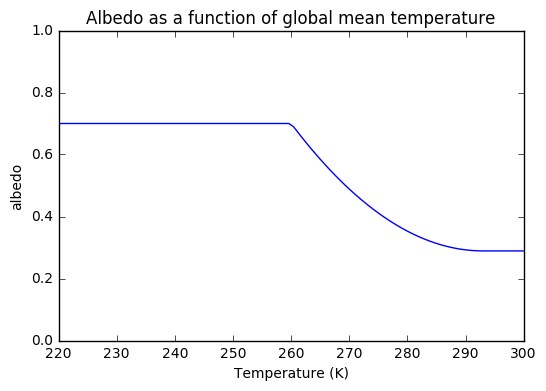

In [8]:
T = np.linspace(220., 300., 100)

plt.plot(T, albedo(T))
plt.xlabel('Temperature (K)')
plt.ylabel('albedo')
plt.ylim(0,1)
plt.title('Albedo as a function of global mean temperature')

### Graphical solution: TOA fluxes as functions of temperature

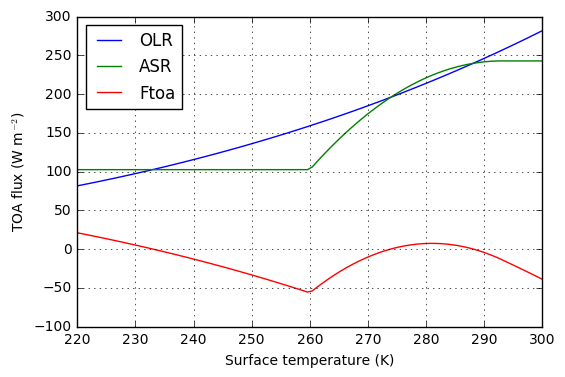

In [9]:
plt.plot(T, OLR(T), label='OLR')
plt.plot(T, ASR(T), label='ASR')
plt.plot(T, Ftoa(T), label='Ftoa')
plt.xlabel('Surface temperature (K)')
plt.ylabel('TOA flux (W m$^{-2}$)')
plt.grid()
plt.legend(loc='upper left')

The graphs meet at three different points! That means there are actually three different possible equilibrium temperatures in this model.

### Numerical solution to get the three equilibrium temperatures

In [10]:
# Use numerical root-finding to get the equilibria
from scipy.optimize import brentq
# brentq is a root-finding function
#  Need to give it a function and two end-points
#  It will look for a zero of the function between those end-points
Teq1 = brentq(Ftoa, 280., 300.)
Teq2 = brentq(Ftoa, 260., 280.)
Teq3 = brentq(Ftoa, 200., 260.)

print Teq1, Teq2, Teq3

288.074863604 273.942366846 232.929959046


### Bonus exercise

Using numerical timestepping and different initial temperatures, can you get the model to converge on all three equilibria, or only some of them?

What do you think this means?

<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Version information
____________


In [15]:
%load_ext version_information
%version_information numpy, climlab

Software versions
Python 2.7.12 64bit [GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]
IPython 5.1.0
OS Darwin 16.4.0 x86_64 i386 64bit
numpy 1.11.1
climlab 0.4.3.dev0
Tue Jan 31 12:44:39 2017 EST

____________

## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php)

Development of these notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.
____________